 ### ASSIGNMENT 1 
 ### NAME: Anshika Garg
 ### Course number: BML815

This assignment is done in jupyter notebook rather than word document itself beacause it is easy to add comments and any text we want to. Understanding report will become much easier if it includes text, images, code, result all in one place.

A dicom Brain MRI medical image (gray scale) of 512x512 pixel is chosen for performing all the operation for doing this assignment. For reading or viewing a dicom file a pudicom package is required to install.

In [2]:
exit()

In [1]:
# installing pydicom package which is important to deal files in dicom format.
pip install pydicom

Text(0.5, 1.0, 'Original Image')

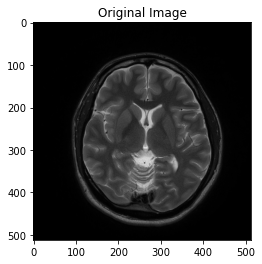

In [2]:
# Reading dicom image
import numpy as np
import pandas as pd
import pydicom as dicom
import matplotlib.pylab as plt

image_path="C:\Mtech-thesis\Biomedical laboratory\Assn2\Q3.dcm" #location 
ds=dicom.dcmread(image_path) #read an dicom image
im= ds.pixel_array #getting pixel array of any image
plt.imshow(im, cmap='gray')
plt.title('Original Image')


In [3]:
# Getting dimensions of an image
im.shape

(512, 512)

In [4]:
# Getting pixel range of an image
def pixel_range(image):
    pixel_range=(image.min(), image.max())
    print(pixel_range)
pixel_range(im)

(0, 1865)


Since the pixel range is too much for the original image. Applying all the operations directly to original image can lead to the
higher computational complexity then the higher values needs to be fixed after the operation. So, it is better to normalize the image between pixel range of 0 to 1.

In [5]:
# Image normalization (pixel range between 0 to 1)
normalized_image= (im-im.min())/im.max()

In [6]:
normalized_image.dtype

dtype('float64')

In [7]:
# getting pixel range of normalized image
pixel_range(normalized_image)

(0.0, 1.0)


Text(0.5, 1.0, 'Normalized Image')

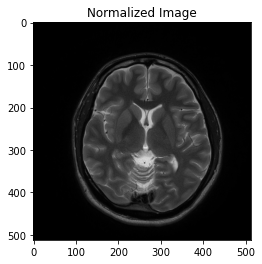

In [8]:
#plotting normalized image
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')

Visually there is no difference in original image and normalized image because only the intensity of image is changed or we can say pixel range gets changed. Image can get converted into any desired pixel range depending on the operation needs to be apply on that, without loosing its information.

Gaussian kernel can be given manually, but the function is required for the easy analysis of effect of convolution on output
image using different size filter.

In [9]:
# writing a function that can give gaussian kernel matrix of given kernel size and standard deviation
def gaussiankernal(size, sigma):
    kernel=np.zeros((size,size))
    
    # Calculate the kernel values
    for i in range(-size//2, size//2+1):
        for j in range(-size//2, size//2+1):
            exponent = -(i**2 + j**2) / (2 * sigma**2)
            kernel[i + size//2, j + size//2] = np.exp(exponent) / (2 * np.pi * sigma**2)

    # Normalize the kernel
    kernel /= np.sum(kernel)

    return kernel

In [10]:
# applying convolution using gaussian kernel


# writing 2D convolution function that take image, stride, padding, and kernel as parameter
def conv2D(image, stride, padding, kernel):
    
    # get the dimensions of input matrix
    input_rows, input_cols= image.shape
    
    # get the dimensions of kernel
    kernel_rows, kernel_cols=kernel.shape
    
    # calculate the dimensions of output matrix
    output_rows , output_cols= (input_rows+2*padding[0]-kernel_rows)//stride[0]+1, (input_cols+2*padding[1]-kernel_rows)//stride[1]+1
    
    # padding the input matrix
    padded_matrix=np.pad(image, [(padding[0], padding[0]), (padding[1], padding[1])], mode='constant')

    # Creating output matrix with zeroes only
    output_matrix=np.zeros((output_rows, output_cols))
    
    #perform the convolution operation
    for i in range (output_rows):
        for j in range(output_cols):
            output_matrix[i][j]=np.sum(padded_matrix[i*stride[0]:i*stride[0]+kernel_rows, 
                                                    j*stride[1]:j*stride[1]+kernel_cols]*kernel)
    return output_matrix

In [11]:
kernel_3x3=gaussiankernal(3,1)

In [12]:
kernel_3x3


array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [13]:
kernel_5x5=gaussiankernal(5,1)

Formula for calculating padding = ((stride - 1) * (input height) - stride + kernel size)
If kernel size is odd, then padding value for top (in height) and left (in width) has the extra value.

In [14]:
# Applying convolution to our normalized image

#1. Using filter 3x3 kernel size, stride=1, padding=1
result1=conv2D(normalized_image, [1,1], [1,1], kernel_3x3)

#2. Using filter 3x3 kernel size, stride=3, padding=1
result2_1=conv2D(normalized_image, [3,3], [1,1], kernel_3x3)
result2_2=conv2D(normalized_image, [3,3], [512,512], kernel_3x3)

#3. Using filter 3x3 kernel size, stride=5, padding=1
result3=conv2D(normalized_image, [5,5], [5,5], kernel_3x3)

#4. Using filter 5x5 kernel size, stride=1, padding=1
result4=conv2D(normalized_image, [1,1], [1,1], kernel_5x5)

#5. Using filter 5x5 kernel size, stride=3, padding=1
result5=conv2D(normalized_image, [3,3], [1,1], kernel_5x5)

#6. Using filter 5x5 kernel size, stride=5, padding=1
result6=conv2D(normalized_image, [5,5], [1,1], kernel_5x5)

Text(0.5, 1.0, 'Figure has size =(512, 512) with padding= 512x512')

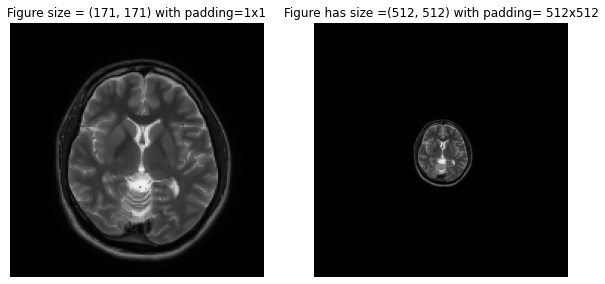

In [15]:
fig=plt.figure(figsize=(10,7))

fig.add_subplot(1,2,1)
plt.imshow(result2_1,cmap='gray')
plt.title('Figure size = '+ str(result2_1.shape) +' with padding=1x1')
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(result2_2, cmap='gray')
plt.axis('off')
plt.title('Figure has size ='+ str(result2_2.shape)+ ' with padding= 512x512')

Padding needs to be done to make sure that after convolution size of an output image and input image will remain same. However,
in this MRI image major portion of background image contains only one pixel value i.e., 0. So after convolution there will be no loss of information even if the size of an output image is smaller than size of input image.
This is the reason that large padding is avoided when applying filter.

Text(0.5, 1.0, 'Kernel size 5x5 and stride=5')

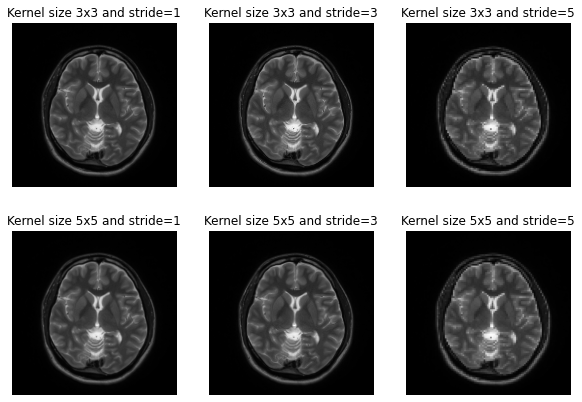

In [16]:
# plotting image in tiled fashion
row=2
column=3
fig=plt.figure(figsize=(10,7))

# adding 1st figure
fig.add_subplot(row, column, 1)
plt.imshow(result1, cmap='gray')
plt.axis('off')
plt.title('Kernel size 3x3 and stride=1')

# adding 2nd figure
fig.add_subplot(row, column, 2)
plt.imshow(result2_1, cmap='gray')
plt.axis('off')
plt.title('Kernel size 3x3 and stride=3')

# adding 3rd figure
fig.add_subplot(row, column, 3)
plt.imshow(result3, cmap='gray')
plt.axis('off')
plt.title('Kernel size 3x3 and stride=5')

# adding 4th figure
fig.add_subplot(row, column, 4)
plt.imshow(result4, cmap='gray')
plt.axis('off')
plt.title('Kernel size 5x5 and stride=1')

# adding 5th figure
fig.add_subplot(row, column, 5)
plt.imshow(result5, cmap='gray')
plt.axis('off')
plt.title('Kernel size 5x5 and stride=3')

# adding 6th figure
fig.add_subplot(row, column, 6)
plt.imshow(result6, cmap='gray')
plt.axis('off')
plt.title('Kernel size 5x5 and stride=5')

The kernel size and stride are important hyperparameters in convolution using a Gaussian kernel for the following reasons:

1. Kernel size: determines the size of the local receptive field in the input image and thus affects the amount of contextual information included in each convolution operation. A larger kernel size leads to a larger context but also increases computation time.

2. Stride: determines the step size of the sliding window and affects the spatial resolution of the output feature map. A larger stride reduces the spatial resolution, while a smaller stride increases computation time.

Together, the kernel size and stride control the trade-off between computation time, feature resolution, and contextual information in the convolution operation.

### Applying filter to sharpen the convoluted image
There are two filters that can be used to sharpen the image (i) laplace filter, (ii) high boost filtering. Here in this assignment laplacian filter is used to sharpen the convoluted image. It  is a type of high-pass filter. The filter enhances the edges in an image by subtracting a blurred version of the image from itself. 
In this assignment laplacian filter is applied to convoluted image with 5x5 gaussian kernel with stride of 5x5

The Laplacian filter can be represented as a matrix:

In [36]:
# creating three laplacian filter of different intensities
laplacian_filter1=np.array([[0, -1, 0],
                 [-1, 4, -1],
                 [0, -1, 0]])

laplacian_filter2=np.array([[0, -1, 0],
                 [-1, 8, -1],
                 [0, -1, 0]])

laplacian_filter3=np.array([[0, -1, 0],
                 [-1, 16, -1],
                 [0, -1, 0]])

Stride and padding is kept 1x1 because more the striding is, more will be blurring of an image. 

Text(0.5, 1.0, 'D. Sharpened using very strong laplacian filter')

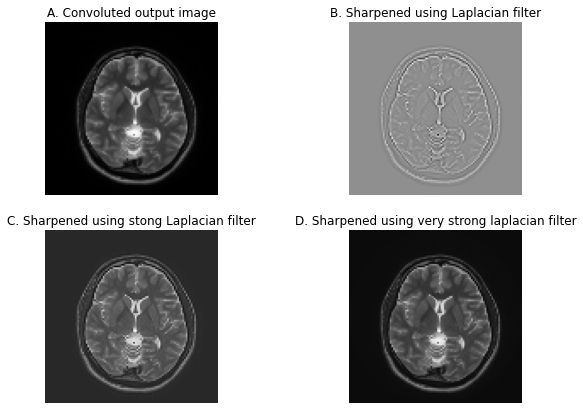

In [40]:
# applying convolution using laplace filter
sharped_image1=conv2D(result6, [1,1], [1,1], laplacian_filter1)

sharped_image2=conv2D(result6, [1,1], [1,1], laplacian_filter2)

sharped_image3=conv2D(result6, [1,1], [1,1], laplacian_filter3)

fig=plt.figure(figsize=(10,7))

# adding 1st figure
fig.add_subplot(2,2, 1)
plt.imshow(result6, cmap='gray')
plt.axis('off')
plt.title('A. Convoluted output image')


# adding 1st figure
fig.add_subplot(2,2, 2)
plt.imshow(sharped_image1, cmap='gray')
plt.axis('off')
plt.title('B. Sharpened using Laplacian filter')

# adding 2nd figure
fig.add_subplot(2,2,3)
plt.imshow(sharped_image2, cmap='gray')
plt.axis('off')
plt.title('C. Sharpened using stong Laplacian filter')

# adding 3rd figure
fig.add_subplot(2,2,4)
plt.imshow(sharped_image3, cmap='gray')
plt.axis('off')
plt.title('D. Sharpened using very strong laplacian filter')

Image 'B' is looking unusual. This might be because large change in pixel values. This image can be normalised to 0 to 1 pixel range to get the proper image.
In the above figure, it is shown as the intensity of laplacian filter is increased, the image will become more sharper. However, it is important to keep low striding and low kernel size of an image. More striding, and large kernel size will eventually blurr the image rather than sharpen the image.

### End of Assignment